In [4]:
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical
np.random.seed(5)

In [5]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [6]:
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [7]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [8]:
len(seq)

54

In [10]:
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

(50, 5)
one hot encoding vector size is  12


In [11]:
dataset

array([[11,  9,  2, 10,  8],
       [ 9,  2, 10,  8,  1],
       [ 2, 10,  8,  1,  7],
       [10,  8,  1,  7,  8],
       [ 8,  1,  7,  8,  9],
       [ 1,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 11],
       [ 9, 10, 11, 11,  4],
       [10, 11, 11,  4, 11],
       [11, 11,  4, 11,  9],
       [11,  4, 11,  9,  9],
       [ 4, 11,  9,  9,  9],
       [11,  9,  9,  9, 10],
       [ 9,  9,  9, 10,  8],
       [ 9,  9, 10,  8,  1],
       [ 9, 10,  8,  1,  7],
       [10,  8,  1,  7,  9],
       [ 8,  1,  7,  9, 11],
       [ 1,  7,  9, 11, 11],
       [ 7,  9, 11, 11,  9],
       [ 9, 11, 11,  9,  9],
       [11, 11,  9,  9,  2],
       [11,  9,  9,  2,  8],
       [ 9,  9,  2,  8,  8],
       [ 9,  2,  8,  8,  8],
       [ 2,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  8],
       [ 8,  8,  8,  8,  9],
       [ 8,  8,  8,  9,  3],
       [ 8,  8,  9,  3,  9],
       [ 8,  9,  3,  9,  9],
       [ 9,  3,  9,  9,  9],
       [ 3,  9,  9,  9,  9],
       [ 9,  9

In [12]:
x_train

array([[[0.84615385],
        [0.69230769],
        [0.15384615],
        [0.76923077]],

       [[0.69230769],
        [0.15384615],
        [0.76923077],
        [0.61538462]],

       [[0.15384615],
        [0.76923077],
        [0.61538462],
        [0.07692308]],

       [[0.76923077],
        [0.61538462],
        [0.07692308],
        [0.53846154]],

       [[0.61538462],
        [0.07692308],
        [0.53846154],
        [0.61538462]],

       [[0.07692308],
        [0.53846154],
        [0.61538462],
        [0.69230769]],

       [[0.53846154],
        [0.61538462],
        [0.69230769],
        [0.76923077]],

       [[0.61538462],
        [0.69230769],
        [0.76923077],
        [0.84615385]],

       [[0.69230769],
        [0.76923077],
        [0.84615385],
        [0.84615385]],

       [[0.76923077],
        [0.84615385],
        [0.84615385],
        [0.30769231]],

       [[0.84615385],
        [0.84615385],
        [0.30769231],
        [0.84615385]],

       [[0

In [13]:
x_train = dataset[:,0:4]
y_train = dataset[:,4]
max_idx_value = 13

In [14]:
x_train

array([[11,  9,  2, 10],
       [ 9,  2, 10,  8],
       [ 2, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  8],
       [ 1,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 11],
       [10, 11, 11,  4],
       [11, 11,  4, 11],
       [11,  4, 11,  9],
       [ 4, 11,  9,  9],
       [11,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  8],
       [ 9, 10,  8,  1],
       [10,  8,  1,  7],
       [ 8,  1,  7,  9],
       [ 1,  7,  9, 11],
       [ 7,  9, 11, 11],
       [ 9, 11, 11,  9],
       [11, 11,  9,  9],
       [11,  9,  9,  2],
       [ 9,  9,  2,  8],
       [ 9,  2,  8,  8],
       [ 2,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  8],
       [ 8,  8,  8,  9],
       [ 8,  8,  9,  3],
       [ 8,  9,  3,  9],
       [ 9,  3,  9,  9],
       [ 3,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9,  9],
       [ 9,  9,  9, 10],
       [ 9,  9, 10,  4],
       [ 9, 10,  4, 11],
       [10,  4, 11,  9],


In [15]:
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]


In [16]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [17]:
print("one hot encoding vector size is ", one_hot_vec_size)

one hot encoding vector size is  12


In [28]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

In [30]:
model.fit(x_train, y_train, epochs=1000, batch_size=10, verbose=2, callbacks=[history])

Train on 50 samples
Epoch 1/1000
50/50 - 0s - loss: 2.4709 - accuracy: 0.0600
Epoch 2/1000
50/50 - 0s - loss: 2.3544 - accuracy: 0.3000
Epoch 3/1000
50/50 - 0s - loss: 2.2752 - accuracy: 0.3400
Epoch 4/1000
50/50 - 0s - loss: 2.1762 - accuracy: 0.3400
Epoch 5/1000
50/50 - 0s - loss: 2.0949 - accuracy: 0.3400
Epoch 6/1000
50/50 - 0s - loss: 2.0157 - accuracy: 0.3400
Epoch 7/1000
50/50 - 0s - loss: 1.9554 - accuracy: 0.3400
Epoch 8/1000
50/50 - 0s - loss: 1.9136 - accuracy: 0.3400
Epoch 9/1000
50/50 - 0s - loss: 1.8883 - accuracy: 0.3400
Epoch 10/1000
50/50 - 0s - loss: 1.8700 - accuracy: 0.3400
Epoch 11/1000
50/50 - 0s - loss: 1.8508 - accuracy: 0.3400
Epoch 12/1000
50/50 - 0s - loss: 1.8364 - accuracy: 0.3400
Epoch 13/1000
50/50 - 0s - loss: 1.8190 - accuracy: 0.3400
Epoch 14/1000
50/50 - 0s - loss: 1.8048 - accuracy: 0.3400
Epoch 15/1000
50/50 - 0s - loss: 1.7936 - accuracy: 0.3400
Epoch 16/1000
50/50 - 0s - loss: 1.7796 - accuracy: 0.3400
Epoch 17/1000
50/50 - 0s - loss: 1.7685 - acc

Epoch 140/1000
50/50 - 0s - loss: 1.2575 - accuracy: 0.5200
Epoch 141/1000
50/50 - 0s - loss: 1.2622 - accuracy: 0.5400
Epoch 142/1000
50/50 - 0s - loss: 1.2548 - accuracy: 0.5400
Epoch 143/1000
50/50 - 0s - loss: 1.2530 - accuracy: 0.5400
Epoch 144/1000
50/50 - 0s - loss: 1.2499 - accuracy: 0.5400
Epoch 145/1000
50/50 - 0s - loss: 1.2465 - accuracy: 0.5400
Epoch 146/1000
50/50 - 0s - loss: 1.2491 - accuracy: 0.5400
Epoch 147/1000
50/50 - 0s - loss: 1.2489 - accuracy: 0.5600
Epoch 148/1000
50/50 - 0s - loss: 1.2364 - accuracy: 0.5400
Epoch 149/1000
50/50 - 0s - loss: 1.2387 - accuracy: 0.5400
Epoch 150/1000
50/50 - 0s - loss: 1.2319 - accuracy: 0.5400
Epoch 151/1000
50/50 - 0s - loss: 1.2414 - accuracy: 0.5400
Epoch 152/1000
50/50 - 0s - loss: 1.2345 - accuracy: 0.5400
Epoch 153/1000
50/50 - 0s - loss: 1.2345 - accuracy: 0.5600
Epoch 154/1000
50/50 - 0s - loss: 1.2290 - accuracy: 0.5400
Epoch 155/1000
50/50 - 0s - loss: 1.2336 - accuracy: 0.5400
Epoch 156/1000
50/50 - 0s - loss: 1.2218

Epoch 277/1000
50/50 - 0s - loss: 1.0038 - accuracy: 0.6000
Epoch 278/1000
50/50 - 0s - loss: 1.0061 - accuracy: 0.5600
Epoch 279/1000
50/50 - 0s - loss: 1.0081 - accuracy: 0.5800
Epoch 280/1000
50/50 - 0s - loss: 0.9967 - accuracy: 0.5600
Epoch 281/1000
50/50 - 0s - loss: 0.9925 - accuracy: 0.5800
Epoch 282/1000
50/50 - 0s - loss: 0.9970 - accuracy: 0.5800
Epoch 283/1000
50/50 - 0s - loss: 1.0017 - accuracy: 0.5800
Epoch 284/1000
50/50 - 0s - loss: 0.9967 - accuracy: 0.5600
Epoch 285/1000
50/50 - 0s - loss: 0.9947 - accuracy: 0.5800
Epoch 286/1000
50/50 - 0s - loss: 0.9910 - accuracy: 0.5800
Epoch 287/1000
50/50 - 0s - loss: 0.9923 - accuracy: 0.5800
Epoch 288/1000
50/50 - 0s - loss: 0.9966 - accuracy: 0.6000
Epoch 289/1000
50/50 - 0s - loss: 0.9865 - accuracy: 0.5600
Epoch 290/1000
50/50 - 0s - loss: 0.9893 - accuracy: 0.5800
Epoch 291/1000
50/50 - 0s - loss: 0.9858 - accuracy: 0.6000
Epoch 292/1000
50/50 - 0s - loss: 0.9815 - accuracy: 0.5800
Epoch 293/1000
50/50 - 0s - loss: 0.9866

Epoch 414/1000
50/50 - 0s - loss: 0.8188 - accuracy: 0.7200
Epoch 415/1000
50/50 - 0s - loss: 0.8146 - accuracy: 0.7200
Epoch 416/1000
50/50 - 0s - loss: 0.8217 - accuracy: 0.7000
Epoch 417/1000
50/50 - 0s - loss: 0.8183 - accuracy: 0.7000
Epoch 418/1000
50/50 - 0s - loss: 0.8125 - accuracy: 0.7000
Epoch 419/1000
50/50 - 0s - loss: 0.8163 - accuracy: 0.6800
Epoch 420/1000
50/50 - 0s - loss: 0.8122 - accuracy: 0.6800
Epoch 421/1000
50/50 - 0s - loss: 0.8121 - accuracy: 0.7200
Epoch 422/1000
50/50 - 0s - loss: 0.8049 - accuracy: 0.7200
Epoch 423/1000
50/50 - 0s - loss: 0.8121 - accuracy: 0.6800
Epoch 424/1000
50/50 - 0s - loss: 0.8082 - accuracy: 0.6800
Epoch 425/1000
50/50 - 0s - loss: 0.8194 - accuracy: 0.6800
Epoch 426/1000
50/50 - 0s - loss: 0.8111 - accuracy: 0.7200
Epoch 427/1000
50/50 - 0s - loss: 0.8033 - accuracy: 0.6800
Epoch 428/1000
50/50 - 0s - loss: 0.8046 - accuracy: 0.7000
Epoch 429/1000
50/50 - 0s - loss: 0.8058 - accuracy: 0.7200
Epoch 430/1000
50/50 - 0s - loss: 0.7975

Epoch 551/1000
50/50 - 0s - loss: 0.6761 - accuracy: 0.7400
Epoch 552/1000
50/50 - 0s - loss: 0.6647 - accuracy: 0.7400
Epoch 553/1000
50/50 - 0s - loss: 0.6539 - accuracy: 0.7400
Epoch 554/1000
50/50 - 0s - loss: 0.6572 - accuracy: 0.7400
Epoch 555/1000
50/50 - 0s - loss: 0.6529 - accuracy: 0.7400
Epoch 556/1000
50/50 - 0s - loss: 0.6552 - accuracy: 0.7400
Epoch 557/1000
50/50 - 0s - loss: 0.6593 - accuracy: 0.7400
Epoch 558/1000
50/50 - 0s - loss: 0.6499 - accuracy: 0.7400
Epoch 559/1000
50/50 - 0s - loss: 0.6497 - accuracy: 0.7400
Epoch 560/1000
50/50 - 0s - loss: 0.6512 - accuracy: 0.7400
Epoch 561/1000
50/50 - 0s - loss: 0.6541 - accuracy: 0.7400
Epoch 562/1000
50/50 - 0s - loss: 0.6526 - accuracy: 0.7600
Epoch 563/1000
50/50 - 0s - loss: 0.6588 - accuracy: 0.7400
Epoch 564/1000
50/50 - 0s - loss: 0.6558 - accuracy: 0.7400
Epoch 565/1000
50/50 - 0s - loss: 0.6464 - accuracy: 0.7400
Epoch 566/1000
50/50 - 0s - loss: 0.6438 - accuracy: 0.7400
Epoch 567/1000
50/50 - 0s - loss: 0.6434

Epoch 688/1000
50/50 - 0s - loss: 0.5500 - accuracy: 0.7800
Epoch 689/1000
50/50 - 0s - loss: 0.5580 - accuracy: 0.7800
Epoch 690/1000
50/50 - 0s - loss: 0.5468 - accuracy: 0.7600
Epoch 691/1000
50/50 - 0s - loss: 0.5479 - accuracy: 0.8000
Epoch 692/1000
50/50 - 0s - loss: 0.5705 - accuracy: 0.7600
Epoch 693/1000
50/50 - 0s - loss: 0.5495 - accuracy: 0.7600
Epoch 694/1000
50/50 - 0s - loss: 0.5451 - accuracy: 0.7800
Epoch 695/1000
50/50 - 0s - loss: 0.5378 - accuracy: 0.7800
Epoch 696/1000
50/50 - 0s - loss: 0.5395 - accuracy: 0.7800
Epoch 697/1000
50/50 - 0s - loss: 0.5348 - accuracy: 0.8000
Epoch 698/1000
50/50 - 0s - loss: 0.5338 - accuracy: 0.8000
Epoch 699/1000
50/50 - 0s - loss: 0.5347 - accuracy: 0.7800
Epoch 700/1000
50/50 - 0s - loss: 0.5355 - accuracy: 0.7600
Epoch 701/1000
50/50 - 0s - loss: 0.5283 - accuracy: 0.7800
Epoch 702/1000
50/50 - 0s - loss: 0.5372 - accuracy: 0.8000
Epoch 703/1000
50/50 - 0s - loss: 0.5302 - accuracy: 0.7800
Epoch 704/1000
50/50 - 0s - loss: 0.5308

Epoch 825/1000
50/50 - 0s - loss: 0.4573 - accuracy: 0.8400
Epoch 826/1000
50/50 - 0s - loss: 0.4566 - accuracy: 0.8400
Epoch 827/1000
50/50 - 0s - loss: 0.4564 - accuracy: 0.8400
Epoch 828/1000
50/50 - 0s - loss: 0.4705 - accuracy: 0.8200
Epoch 829/1000
50/50 - 0s - loss: 0.4523 - accuracy: 0.8400
Epoch 830/1000
50/50 - 0s - loss: 0.4535 - accuracy: 0.8400
Epoch 831/1000
50/50 - 0s - loss: 0.4508 - accuracy: 0.8400
Epoch 832/1000
50/50 - 0s - loss: 0.4516 - accuracy: 0.8200
Epoch 833/1000
50/50 - 0s - loss: 0.4476 - accuracy: 0.8400
Epoch 834/1000
50/50 - 0s - loss: 0.4522 - accuracy: 0.8400
Epoch 835/1000
50/50 - 0s - loss: 0.4489 - accuracy: 0.8400
Epoch 836/1000
50/50 - 0s - loss: 0.4570 - accuracy: 0.8200
Epoch 837/1000
50/50 - 0s - loss: 0.4491 - accuracy: 0.8400
Epoch 838/1000
50/50 - 0s - loss: 0.4560 - accuracy: 0.8200
Epoch 839/1000
50/50 - 0s - loss: 0.4492 - accuracy: 0.8400
Epoch 840/1000
50/50 - 0s - loss: 0.4543 - accuracy: 0.8400
Epoch 841/1000
50/50 - 0s - loss: 0.4512

Epoch 962/1000
50/50 - 0s - loss: 0.3872 - accuracy: 0.8600
Epoch 963/1000
50/50 - 0s - loss: 0.3926 - accuracy: 0.8200
Epoch 964/1000
50/50 - 0s - loss: 0.3913 - accuracy: 0.8600
Epoch 965/1000
50/50 - 0s - loss: 0.3841 - accuracy: 0.8600
Epoch 966/1000
50/50 - 0s - loss: 0.3867 - accuracy: 0.8400
Epoch 967/1000
50/50 - 0s - loss: 0.3911 - accuracy: 0.8400
Epoch 968/1000
50/50 - 0s - loss: 0.3790 - accuracy: 0.8600
Epoch 969/1000
50/50 - 0s - loss: 0.3802 - accuracy: 0.8600
Epoch 970/1000
50/50 - 0s - loss: 0.3891 - accuracy: 0.8800
Epoch 971/1000
50/50 - 0s - loss: 0.3912 - accuracy: 0.8800
Epoch 972/1000
50/50 - 0s - loss: 0.3919 - accuracy: 0.8400
Epoch 973/1000
50/50 - 0s - loss: 0.3777 - accuracy: 0.8600
Epoch 974/1000
50/50 - 0s - loss: 0.3835 - accuracy: 0.8400
Epoch 975/1000
50/50 - 0s - loss: 0.3931 - accuracy: 0.8400
Epoch 976/1000
50/50 - 0s - loss: 0.3915 - accuracy: 0.8400
Epoch 977/1000
50/50 - 0s - loss: 0.3838 - accuracy: 0.8600
Epoch 978/1000
50/50 - 0s - loss: 0.4080

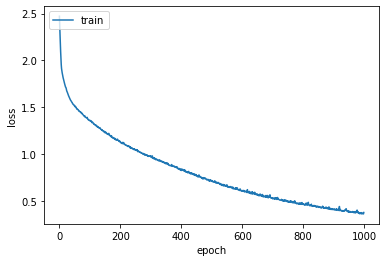

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [32]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/sample - loss: 0.3665 - accuracy: 0.8800
accuracy: 88.00%


In [33]:
pred_count = 50 # 최대 예측 개수 정의

In [34]:
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)


one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'e8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [35]:
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'e8', 'f8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'e8', 'e8', 'f8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8']
